# Physics 201 Spring 2022 Section Week 9 Solutions

Author: Jennifer McGuire, Solomon Barkley

Collaborators: Vinny Manoharan

## Initialization

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore', FutureWarning)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import seaborn as sns
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Exercise 1:

Use sampling to plot the PDF and calculate a 95% HPD interval for each problem in assignment 5. You should be able to use the model objects you defined in week 7 section.

*Hint*: The `tune` and `draws` arguments to `pm.sample()` control the number of calculations used to estimate the posterior. You can use small numbers while you are making adjustments so the code runs quickly, and then use larger numbers to get a more accurate distribution once everything's finalized.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [P]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 23 seconds.


Calculated MAP value: 0.32942036927053026
Assignment 5 solutions: 0.33


<AxesSubplot:title={'center':'P'}>

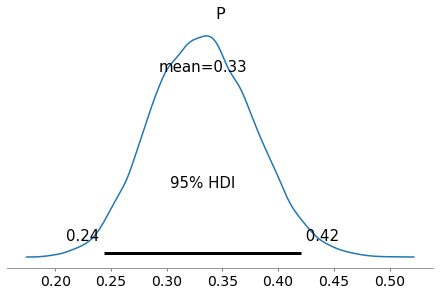

In [2]:
# Assignment 5 problem 3
neuron_model = pm.Model()
with neuron_model:
    firing_probability = pm.TruncatedNormal('P', mu=0.5, sd=0.2, lower=0, upper=1)
    observed = pm.Binomial('count', n=100, p=firing_probability, observed=32)
    MAP = pm.find_MAP()
    trace = pm.sample(tune=2000, draws=5000)
print("Calculated MAP value: {}".format(MAP['P']))
print("Assignment 5 solutions: 0.33")
az.plot_posterior(trace, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rate]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 22 seconds.


Calculated MAP value: 3.0989010960456973
Assignment 5 solutions: 3.10


<AxesSubplot:title={'center':'rate'}>

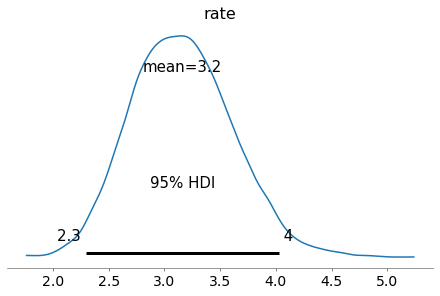

In [3]:
# Assignment 5 problem 4
counts = np.array([1, 4, 2, 2, 5, 3, 4, 5, 1, 2, 4, 4, 2, 2, 6])

decay_model = pm.Model()
with decay_model:
    decay_rate = pm.Exponential('rate', lam=1/6)
    measurements = pm.Poisson('count', mu=decay_rate, observed=counts)
    MAP = pm.find_MAP()
    trace = pm.sample(tune=2000, draws=5000)
print("Calculated MAP value: {}".format(MAP['rate']))
print("Assignment 5 solutions: 3.10")
az.plot_posterior(trace, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 23 seconds.


Calculated MAP value: 216.91600939369758
Assignment 5 solutions: 216.93 (Uniform prior)


<AxesSubplot:title={'center':'mu'}>

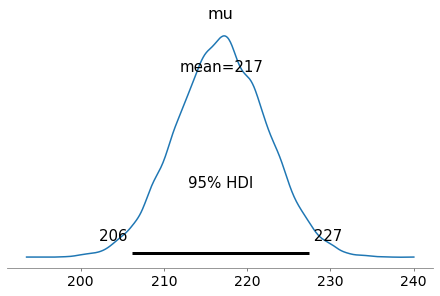

In [4]:
# Assignment 5 problem 5
flux = np.array([313.77, 261.11,  67.96, 199.28, 253.09, 138.48, 222.69, 209.27,
                 200.37, 185.08, 237.  , 302.79, 117.54, 287.86, 219.53, 238.03,
                 102.89, 211.55, 326.84, 107.74,  31.02,  51.05, 222.73, 403.77,
                 296.01, 342.91, 208.47, 319.44, 176.82, 252.39])

flux_model_fixed_noise = pm.Model()
with flux_model_fixed_noise:
    center = pm.Uniform('mu', 0, 1000)
    measurements = pm.Normal('flux', mu=center, sd=30, observed=flux)
    MAP = pm.find_MAP()
    trace = pm.sample(tune=2000, draws=5000)
print("Calculated MAP value: {}".format(MAP['mu']))
print("Assignment 5 solutions: 216.93 (Uniform prior)")
az.plot_posterior(trace, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [noise, mu]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 29 seconds.


Calculated MAP value: mu=216.9159365262041, sigma=87.50205102069535
Assignment 5 solutions: not calculated


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'noise'}>], dtype=object)

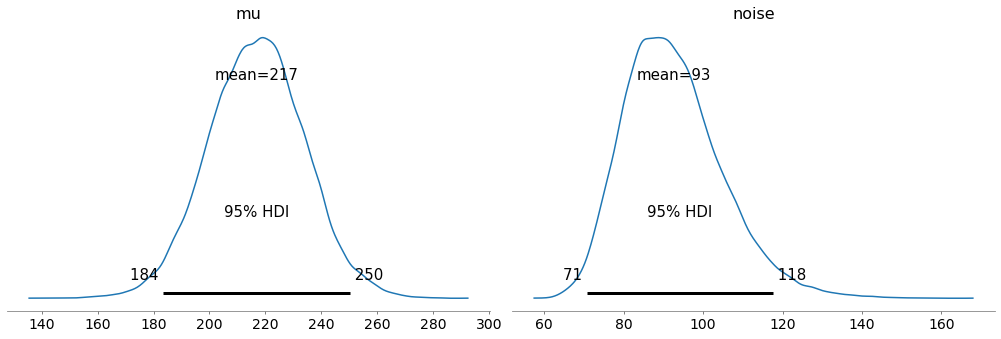

In [5]:
# Assignment 5 problem 6

flux_model_variable_noise = pm.Model()
with flux_model_variable_noise:
    center = pm.Uniform('mu', 0, 1000)
    noise = pm.Gamma('noise', alpha=2, beta=0.02)
    measurements = pm.Normal('flux', mu=center, sd=noise, observed=flux)
    MAP = pm.find_MAP()
    trace = pm.sample(tune=2000, draws=10000) # we increase draws to 10000 to get good sampling
print("Calculated MAP value: mu={}, sigma={}".format(MAP['mu'], MAP['noise']))
print("Assignment 5 solutions: not calculated")
az.plot_posterior(trace, hdi_prob=0.95)